In [1]:
from tensorflow import keras

import tensorflow as tf
import random as python_random

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


In [2]:
MArel = pd.read_csv('2linear/MA_relative_dataset.csv')

In [25]:
# establish predictors and targets
x = MArel[['e1_perturbed', 'relative_s2','relative_flux']].values
y = MArel[['k1', 'k2']].values


In [26]:
# split into train and test data
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.20,
                                                    random_state=111)


In [27]:
# normalize data
scaler = StandardScaler().fit(x_train)
x_train_norm = scaler.transform(x_train)
x_test_norm = scaler.transform(x_test)


(array([217., 604., 101.,  37.,  15.,  12.,   6.,   5.,   1.,   2.]),
 array([0.09656758, 0.752084  , 1.40760043, 2.06311685, 2.71863328,
        3.3741497 , 4.02966613, 4.68518255, 5.34069898, 5.9962154 ,
        6.65173183]),
 <BarContainer object of 10 artists>)

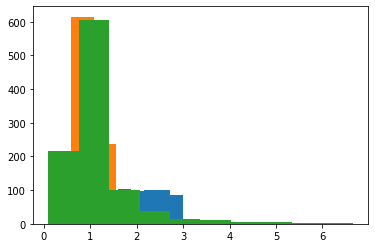

In [57]:
plt.hist(x_test[:,0])
plt.hist(x_test[:,1])
plt.hist(x_test[:,2])

(array([217., 604., 101.,  37.,  15.,  12.,   6.,   5.,   1.,   2.]),
 array([-1.40068023, -0.53530174,  0.33007674,  1.19545523,  2.06083372,
         2.92621221,  3.7915907 ,  4.65696918,  5.52234767,  6.38772616,
         7.25310465]),
 <BarContainer object of 10 artists>)

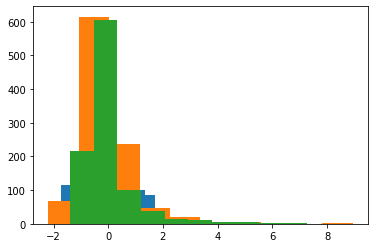

In [60]:
plt.hist(x_test_norm[:,0])
plt.hist(x_test_norm[:,1])
plt.hist(x_test_norm[:,2])

In [61]:
x_train_norm.shape[1]

3

In [62]:
# define the NN
def nnmodel1():
    model = Sequential()
    model.add(Dense(4, input_dim=x_train_norm.shape[1], kernel_initializer='normal', activation='relu'))
    model.add(Dense(20, kernel_initializer='normal', activation='relu'))
    model.add(Dense(2, kernel_initializer='normal'))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [63]:
# train the NN
np.random.seed(1)
estimator = KerasRegressor(build_fn=nnmodel1)
history = estimator.fit(x_train_norm, y_train, validation_split=0.33, epochs=20, batch_size=32)

Epoch 1/20
84/84 [==============================] - 2s 8ms/step - loss: 0.2968 - val_loss: 0.1069
Epoch 2/20
84/84 [==============================] - 0s 3ms/step - loss: 0.0972 - val_loss: 0.0866
Epoch 3/20
84/84 [==============================] - 0s 3ms/step - loss: 0.0852 - val_loss: 0.0852
Epoch 4/20
84/84 [==============================] - 0s 3ms/step - loss: 0.0861 - val_loss: 0.0848
Epoch 5/20
84/84 [==============================] - 0s 3ms/step - loss: 0.0870 - val_loss: 0.0846
Epoch 6/20
84/84 [==============================] - 0s 4ms/step - loss: 0.0868 - val_loss: 0.0846
Epoch 7/20
84/84 [==============================] - 1s 7ms/step - loss: 0.0835 - val_loss: 0.0846
Epoch 8/20
84/84 [==============================] - 1s 7ms/step - loss: 0.0833 - val_loss: 0.0845
Epoch 9/20
84/84 [==============================] - 0s 4ms/step - loss: 0.0838 - val_loss: 0.0844
Epoch 10/20
84/84 [==============================] - 0s 5ms/step - loss: 0.0853 - val_loss: 0.0843
Epoch 11/20
84/84 [

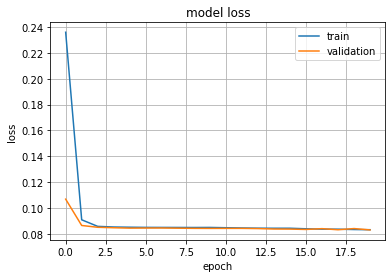

In [64]:
plt.plot(range(20),history.history['loss'])
plt.plot(range(20),history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch') #epoch
plt.legend(['train', 'validation'], loc='upper right')
plt.grid()
plt.show()

In [65]:
print("final MSE for train is %.2f and for validation is %.2f" % 
      (history.history['loss'][-1], history.history['val_loss'][-1]))

final MSE for train is 0.08 and for validation is 0.08


In [66]:
# test the NN
test_loss = estimator.model.evaluate(x_test_norm, y_test)
print("test set mse is %.2f" % test_loss)

32/32 [==============================] - 0s 1ms/step - loss: 0.0808
test set mse is 0.08


In [71]:
#Predict with the NN
y_test_predict = estimator.predict(x_test_norm)

In [72]:
y_test_predict.shape

(1000, 2)

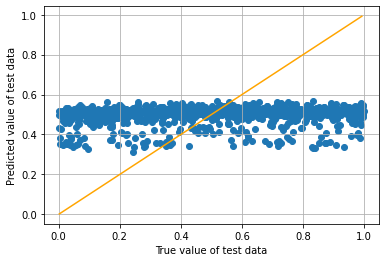

In [73]:
# plot predictions
plt.scatter(y_test[:,0], y_test_predict[:,0])
plt.xlabel("True value of test data")
plt.ylabel("Predicted value of test data")
plt.plot(np.arange(min(y_test[:,0]),max(y_test[:,0]),0.01),np.arange(min(y_test[:,0]),max(y_test[:,0]),0.01),c='orange')
plt.grid()

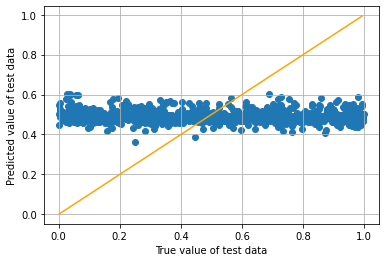

In [74]:
# plot predictions
plt.scatter(y_test[:,0], y_test_predict[:,1])
plt.xlabel("True value of test data")
plt.ylabel("Predicted value of test data")
plt.plot(np.arange(min(y_test[:,0]),max(y_test[:,0]),0.01),np.arange(min(y_test[:,0]),max(y_test[:,0]),0.01),c='orange')
plt.grid()

In [ ]:
# Tune the NN